In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=["feature1", "feature2"])
df["Class"] = y
df.head()

,feature1,feature2,Class
0,-0.999102,-0.663860,1
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,1.141165,1.059449,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")


print("Accuracy: {acc}\n Precision:{prec}\n Recall:{recall}")

Confusion Matrix:
[[93  8]
 [16 83]]
Accuracy: {acc}
 Precision:{prec}
 Recall:{recall}


In [18]:
new_data = np.array([[-0.5, 1.0], [0.3, -0.7]])
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)
print("Predicted class:", new_pred)


Predicted class: [1 0]


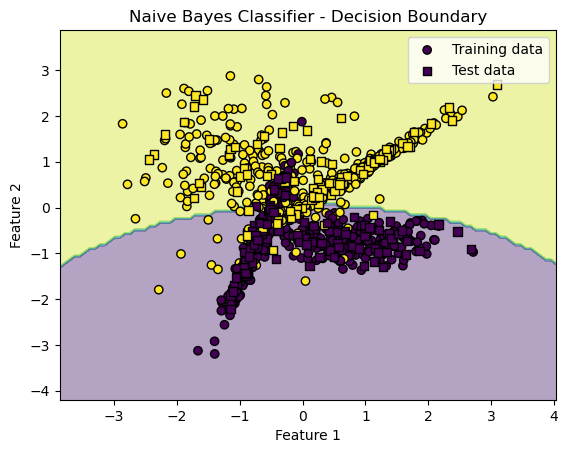

In [19]:
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', label='Test data')
plt.title("Naive Bayes Classifier - Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()